 
# Parameter Estimation and Maximum Likelihood 
 

The concept of **likelihood** and **maximum likelihood estimation (MLE)** have been at the core of much of statistical modeling for about 100 years. In the 21st Century, these ideas continue to be foundational. 

Understanding the concept of likelihood and the use of MLE methods is key to understanding many parametric statistical methods. Further, widely used machine learning models, including some deep learning models, use MLE. 

Our goal here is to find **parameter vector $\theta$ that maximize the likelihood** of a parametric model or distribution, **given the observations, $\mathbf{X} = x_1, x_2, \ldots, x_n$**. This concept is the core of **maximum likelihood estimation**.       

Stigler -@Stigler_2007 traces the long history of the concepts of likelihood and the MLE. The history starts with workers in the early 19th Century, including Gauss and Bernoulli. Major advances are marked by Fisher's seminal work in the 1920s and 1930s in establishing key properties of the MLE. Today, MLE is a workhorse of many commonly used statistical models, as well as advanced AI models employing deep neural networks.       

Unfortunately, the concepts of likelihood and maximum likelihood can appear abstract and hard to understand at first. However, the valuable understanding that a working knowledge of these topics provides for working data scientists is worth the effort.  

## Likelihood   

Likelihood is a measure of how likely it is that a set of observations, $\mathbf{X} = x_1, x_2, \ldots, x_n$, arises from a **generating process** with a **parametric probability distribution**, $f(\mathbf{X} | \theta)$. $f(\mathbf{X}\ |\ \mathbf{\theta})$ can be either a probability density function (PDF), for continuous distributions, or a probability mass function (PMF), for discrete distributions. The distribution parameter vector, $\mathbf{\theta}$, is fixed.  

Now, for each observation, $x_i$, in $\mathbf{X} = x_1, x_2, \ldots, x_n$, the probability is just $f(x_i |\ \mathbf{\theta})$. For the set of observations, the **likelihood** is the product of these probabilities: 

$$\mathcal{L}(\mathbf{X} |\ \mathbf{\theta}) = \prod_{i=1}^n f(x_i | \mathbf{\theta})$$

In most practical cases, we work with the **log-likelihood**. For a set of observations, $\mathbf{X} = x_1, x_2, \ldots, x_n$, the log-likelihood is expressed:    

$$l(\mathbf{X} |\ \mathbf{\theta}) = log\big( \mathcal{L}(\mathbf{X} |\ \mathbf{\theta}) \big) = \sum_{i=1}^n log \Big( f(x_i\ |\ \mathbf{\theta}) \Big)$$   

Working with the log-likelihood means that we work with the sum of log probabilities rather than the product. If the probabilities are small, the sum is numerically stable. Whereas, the product of many small numbers is a very small number, which can lead to numerical underflow even for 64 or 128 bit floating point arithmetic.    

### Example: The Normal likelihood

The **Normal likelihood** is the product of Normal probabilities of the observations, $\mathbf{X} = x_1, x_2, \ldots, x_n$. Using the properties of the exponential function, for $n$ observations, $\mathbf{X} = x_1, x_2, \ldots, x_n$, the likelihood is:   

$$\mathcal{L}(\mathbf{X} |\ \mathbf{\theta}) = \prod_{i=1}^n f(x\ |\ \mu,\sigma^2)  = -\frac{1}{(2 \pi \sigma^2)^{n/2}} exp\Big[ - \frac{1}{2 \sigma^2}  \sum_{i=1}^n(x_i - \mu)^2 \Big]$$

The log-likelihood can then be written:  

$$l(\mathbf{X}\ |\ \mu, \sigma ) = - \frac{n}{2} log( 2 \pi \sigma^2 ) - \frac{1}{2 \sigma^2} \sum_{j=1}^n (x_j - \mu)^2$$

It is clear that the log-likelihood is a function of the parameter vector, $\theta = [\mu,\sigma]$. Notice also that as the number of observations increases so does the likelihood.   

To continue executing the code in the cell below to import the required packages.  

In [1]:
## Imports
import matplotlib.pyplot as plt
from scipy.stats import norm, binom
import numpy as np
import numpy.random as nr
import pandas as pd
import seaborn as sns
from math import sqrt
%matplotlib inline

An example will help illustrate the foregoing concepts. The code below plots the likelihood for 5, 10, and 20 samples from a **standard Normal distribution**. A standard Normal distribution has parameter vector $\theta = [\mu,\sigma] = [1, 0]$. In this example, we vary the parameter $\mu$, and assume the parameter $\sigma$ is fixed to 1.0. The steps are:     
- A random sample is drawn from a standard Normal distribution.    
- For the random sample the log-likelihood is computed at each location parameter value. In code, we do this by summing the logarithm of the PDFs for each observation at a value of the parameter $\mu$. The lambda (anonymous  function) specified the log of the PDF using the [scipy.stats.norm.logpdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) function.      
- The log-likelihood is plotted for each of the location parameter values.    


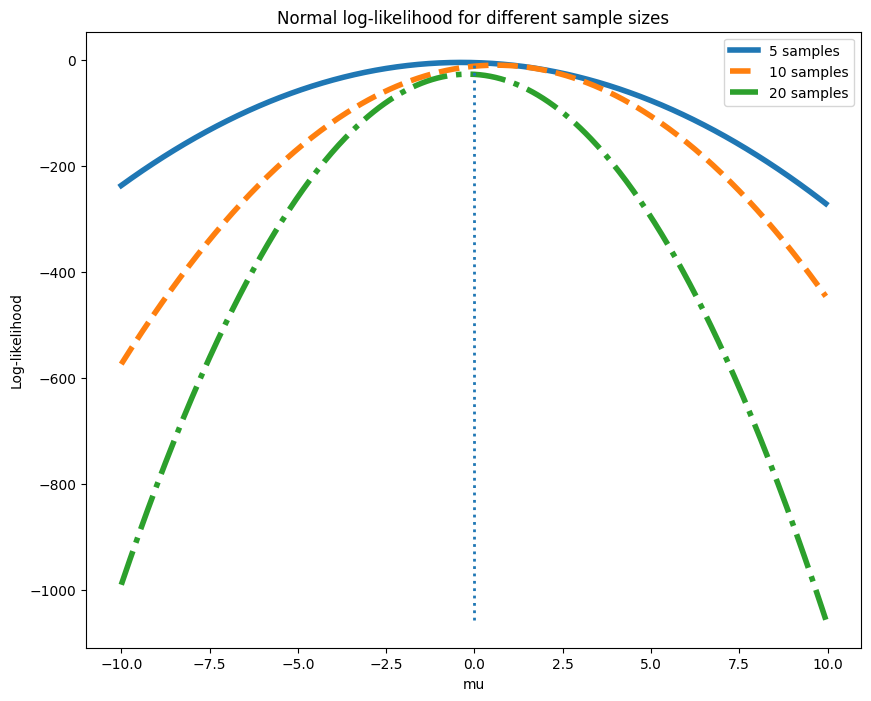

In [4]:
def plot_likelihood_1(sample_dist, pdf, num_samples, start, stop, linestyle, xlabel = 'x', max_point=0.0, title = '', figsize=(10,8)):
    ## Setup for plot
    fig, ax = plt.subplots(figsize=figsize) 
    X = np.arange(start, stop, step=0.05)

    ## Loop over the number of samples
    for i,samps in enumerate(num_samples): 
        ## Compute a sample from standard Normal
        sample = sample_dist(samps)
        ## Iterate over the x values and compute the likelihood
        y=[pdf(sample, mu).sum() for mu in X]
        ## Plot the likelihood    
        _=ax.plot(X, y, linewidth=4, label= str(samps) + ' samples', linestyle=linestyle[i])

    ## Add annotations to plot
    ax.vlines(max_point, ymin=min(y), ymax=0.0, linewidth=2, linestyles='dotted')
    ax.set_ylabel('Log-likelihood')
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.legend()
    plt.show()         


sample_dist = lambda x: nr.normal(size=x)
pdf = lambda x, y: norm.logpdf(x, loc=y)
num_samples = [5, 10, 20]
start = -10.0
stop = 10.0
linestyle = ['solid','dashed','dashdot']
plot_likelihood_1(sample_dist, pdf, num_samples, start, stop, linestyle, xlabel='mu', title='Normal log-likelihood for different sample sizes')


Notice the following expected properties:    
- The maximum of the likelihood is near the actual location parameter value the samples were drawn from, $\mu=1$.     
- As the number of samples increases the curvature of the log-likelihood increases and the width decreases. The width of these curves is a measure of the uncertainty of the parameter estimate. This behavior indicates that the dispersion of the MLE estimate of the $u$ decreases with increasing sample size. In other words, the **uncertainty in maximum likelihood estimates decreases as sample size increases**.       

> **Exercise 3-1:** With the foregoing theory and example in mind, it is time to work with a more realistic example. One might consider modeling the price per square foot of housing using the parametric log-Normal density function. The univariate log-Normal density function has two parameters, $(\mu,\sigma)$. Complete the code in the `likelihood_grid` function to compute the likelihood in a 2-dimensional array by the following steps:       
> 1. Create a 2-dimensional Numpy array of 0s of dimensions (number of sigma values, number of mu values). You can use the [numpy.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html). function to do so.    
> 2. Iterate over all pairs of mu and sigma values in the grid with `np.ndindex(param_grid[0].shape).` For each parameter vector, compute the likelihood using [scipy.stats.norm.logpdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) and fill in the element of the Numpy array.  
> Execute the code and examine the resulting plot.   

Check for 247082 rows with shape = (247082, 8)
Empirical estimates of sample: mu = 4.468603907197355   sigma = 0.3825497727012868
(15, 40)


shape of mu_values = (40,)
shape of sigma_values = (15,)
shape of likelihood = (15, 40)


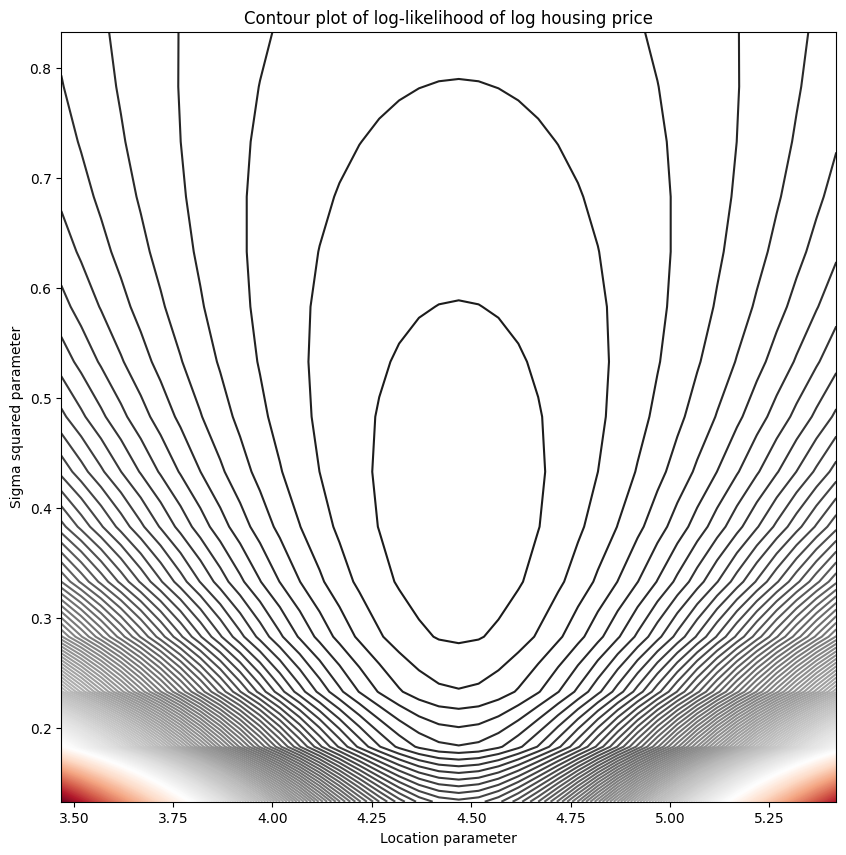

In [5]:
housing = pd.read_csv('..//data//housing.csv')
print(f"Check for 247082 rows with shape = {housing.shape}")

## Remove null values and compute log of medium price for square foot
housing = housing[housing.loc[:,'medListPriceSqft'].notnull()]
housing.loc[:,'log_medListPriceSqft'] = np.log(housing.loc[:,'medListPriceSqft'])

## Random sample the log median list price 
size = 100
np.random.seed(10101)
log_housing_price_100 = np.random.choice(housing.loc[:,'log_medListPriceSqft'], size=size, replace=False)
mu = np.mean(log_housing_price_100)
sigma = sqrt(np.var(log_housing_price_100))
print(f"Empirical estimates of sample: mu = {mu}   sigma = {sigma}")

def likelihood_grid(x, mu_range=(mu - 2.0, mu + 2.0), sigma_range=(sigma/2, 2*sigma)): 
    ## Compute vectors of mu and sigma values and use these to create a grid   
    mu_values = np.arange(mu_range[0], mu_range[1], step=0.05)
    sigma_values = np.arange(sigma_range[0], sigma_range[1], step = 0.05)
    param_grid = np.meshgrid(mu_values, sigma_values)
    print(param_grid[0].shape)
    print('\n')
    
    ## Add your code below to fill in the grid or 
    ## Numpy array with likelihood values. Name the array of dimension
    ## (# mu values, # sigma values) likelihood. 
    likelihood = np.zeros((len(sigma_values),len(mu_values)))
    for mu,sigma in np.ndindex(param_grid[0].shape):
        likelihood[mu,sigma] = norm.logpdf(x, loc=param_grid[0][mu,sigma], scale=param_grid[1][mu,sigma]).sum()
    return likelihood, mu_values, sigma_values   

def plot_Normal_likelihood(x, mu_range=(mu - 1.0, mu + 1.0), sigma_range=(sigma - 0.25, sigma + 0.5), levels=200):
    likelihood, mu_values, sigma_values = likelihood_grid(x, mu_range=mu_range, sigma_range=sigma_range)
    fig, ax = plt.subplots(figsize=(10, 10))
    print('shape of mu_values = '+str(mu_values.shape))
    
    print('shape of sigma_values = '+str(sigma_values.shape))
    print('shape of likelihood = '+str(likelihood.shape))
    ax.contour(mu_values, sigma_values, likelihood, levels=levels, cmap='RdGy')
    ax.set_title('Contour plot of log-likelihood of log housing price')
    ax.set_ylabel('Sigma squared parameter')
    ax.set_xlabel('Location parameter')

plot_Normal_likelihood(log_housing_price_100)

> Examine the contour plot. Notice that there is a clear maximum with log-likelihood decreasing away from this maximum. Answer the following questions:      
> 1. Which parameter values are approximately the maximum of the log-likelihood?     
> 2. For which parameter is the log-likelihood not symmetric about the maximum? 
> 3. How does this asymmetric gradient limit the accuracy of the parameter estimation?  

> **Answers:**      
> 1. The mean is close to the estimate whereas the maximum likelihood for sigma is must different from the value based on the variance estimate.    
> 2. The contours are not symmetric for sigma. The gradient is high for small values since there is a constraint that $\sigma>0$,          
> 3. The gradient is rather flat for sigma around the maximum likelihood point, particularly as the value of $\sigma$ increases beyond the maximum log-likelihood point. This low gradient of slope limits the accuracy of the estimate.         

### Example: Binomial Likelihood   

In the foregoing example, we investigated the log-likelihood of the Normal distribution. Now, we will explore a different example of log-likelihood for the Binomial distribution. Some differences include:   
- The Binomial distribution models **discrete events**. The Normal distribution is for continuous-valued observations.    
- The range of the single parameter, $\pi$, of the Binomial distribution is restricted to the range $0 \le \pi \le 1$. At least in principle, the range of the location parameter, $\mu$, of the Normal distribution is in the range $-\infty \le \mu \le \infty$, with the scale parameter limited to the range $0 < \mu \le \infty$.    

Recall that the Binomial distribution has the following probability mass function (PMF) for $k$ successes in $n$ trials:        

$$
f(k, n\ |\ \pi) = \binom{n}{y} \pi^k (1 - \pi)^{n-k}
$$
$$
0 \le \pi \le 1
$$
$$
0 \le k \le n
$$

Given this PDF, the log-likelihood is easily found:    

$$l(k, n | \pi) = log \binom{n}{k} + k\ log(\pi) + (n-k)\ log(1-\pi)$$

You can see that the Binomial log-likelihood has a strong dependence on both the sample size, $n$ and the number of successes, $k$.    

> **Exercise 3-2:** Consider how one might use the concept of likelihood to determine if a fair coin is being used in a toss. Let 'heads' be a success. The question is, how likely are the observed results to be from a fair coin for different sample sizes? Perform the following steps:    
> 1. Define `num_samples = [25, 50, 100]`.
> 2. Assign an anonymous function to the name `sample_dist`, which simulates tosses of a fair coin $(\pi = 0.5)$ with random draws from a Binomial distribution using [numpy.random.binomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html) with $n=1$.      
> 3. Define a function named `pmf`which uses arguments of the values of the observations, $x$, and the probability parameter, $p$ and returns the log-binomial likelihood using the [scipy.stats.binom.logpmf](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html) function. 
> 4. Execute the code and examine the result.   

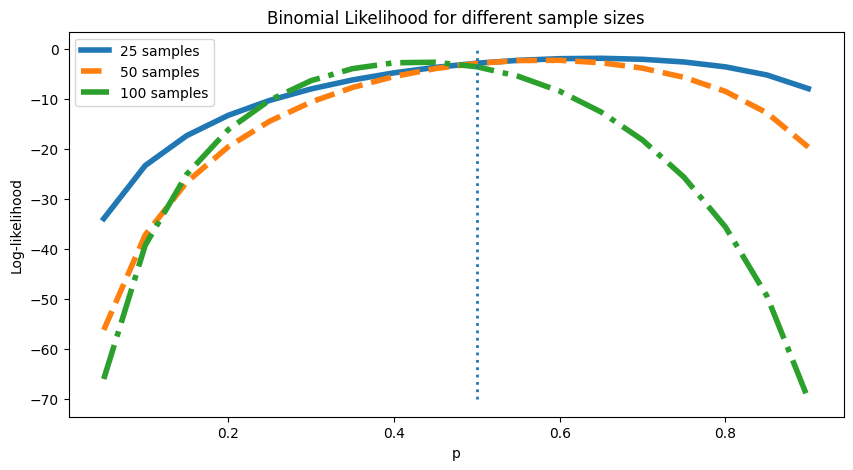

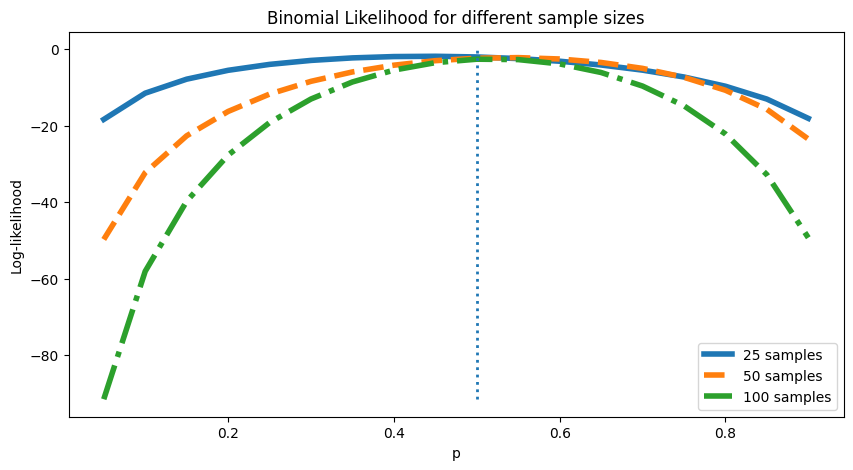

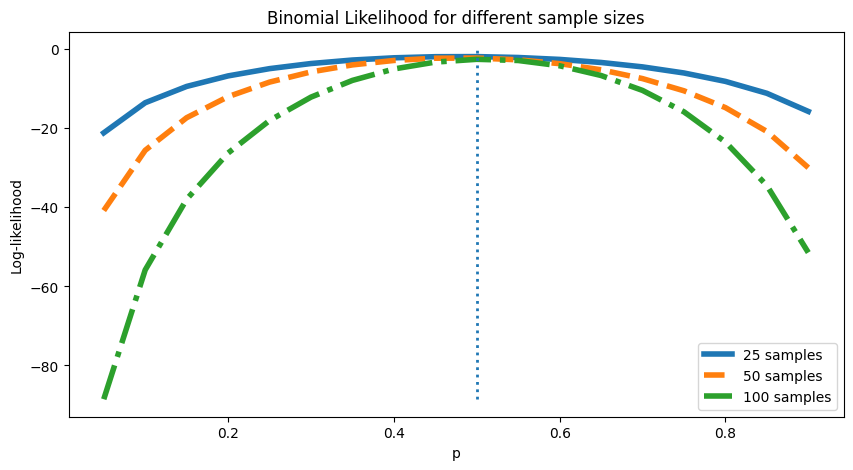

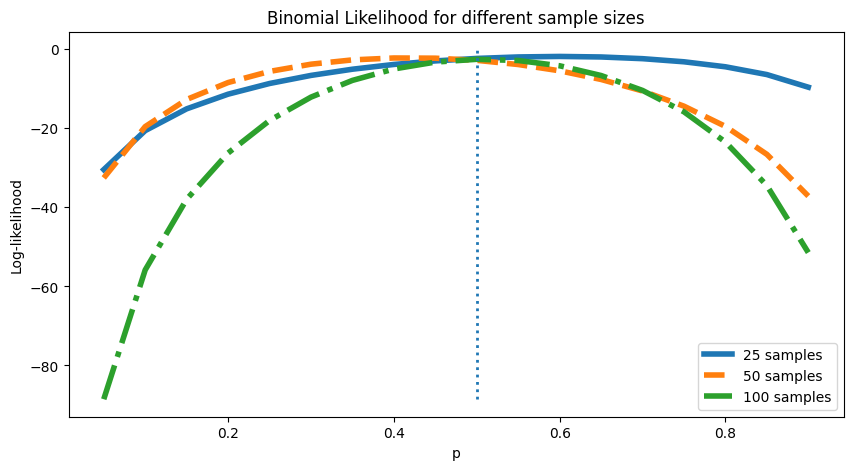

In [6]:
p=0.5
np.random.seed(4687)

## Your code goes below       
sample_dist = lambda x: nr.binomial(n=1, p=p, size=x)
def pmf(x, p):
    ## FIrst compute parameters
    n = len(x)
    k = np.sum(x)
    ## Return the log likelihood
    return binom.logpmf(k, n, p)
num_samples = [25, 50, 100]


start = 0.05
stop = 0.95
linestyle = ['solid','dashed','dashdot']
for _ in range(4):
    plot_likelihood_1(sample_dist, pmf, num_samples, start, stop, linestyle, xlabel='p', max_point=p, title='Binomial Likelihood for different sample sizes', figsize=(10,5))

> Answer the following questions:    
> 1. How does the shape of the likelihood curve change with sample size? 
> 2. How does the shape of the likelihood curves change with the random draw for each sample size?    
> 3. Are the maximums of the likelihood curves near the expected value of 0.5?  
> 4. Based on your above answers, what can you say about the confidence you should have in determining if a coin is fair for these different sample sizes?    

> **Answers:**    
> 1. The curvature (gradient) of the likelihood increases as the number of samples increases.      
> 2. For the 25 and 50 sample curves change the slope (gradient) with each random draw of the samples, whereas, for the 100 sample curve the variation is less.     
> 3. For the 100-sample curve, the maximum likelihood is close to the theoretical value, whereas there is considerable variation for the 25 and 50-sample curves.    
> 4. The confidence in the parameter estimate for 100 observations will have low variation, whereas for the 25 and 50 sample curves there will be considerable variation.        

## Finding Solutions Without a Closed Form

So far in this discussion, we have only explored cases where the maximum likelihood solution is a closed form. In the foregoing examples, simple algebra produced solutions. In general, this will not be the case. A common example, is logistic regression, which has no closed form maximum likelihood solution exists.   

When no closed-form solution is available an approximate solution can be found by numerical **optimization methods** or **root finding methods**. Here, we will briefly examine gradient descent.    

### Gradient descent methods

The gradient descent method has an intuitive explanation. The maximum of the log-likelihood function can be found by following the **gradient of the log-likelihood function** until a maximum is reached. 

To formulate this algorithm, we start with the gradient of the log-likelihood function with respect to the parameters, $\theta$. The gradient is the vector of partial derivatives with respect to each of the dimensions of the parameter vector.   

$$
grad(l(\vec{\theta})) =  \nabla_\theta\ l(\vec{\theta}) = \begin{pmatrix}
  \frac{\partial l(\mathbf{X}\ |\ \mathbf{\theta})}{\partial \theta_1} \\
   \frac{\partial l(\mathbf{X}\ |\ \mathbf{\theta})}{\partial \theta_2}\\
   \vdots \\
   \frac{\partial l(\mathbf{X}\ |\ \mathbf{\theta})}{\partial \theta_n} 
 \end{pmatrix}
 $$

We will use the notation, $\hat{\theta}$, to indicate an estimate of the true parameter vector, $\vec{\theta}$. Given a current parameter estimate vector at step n , $\hat{\theta}_n$, the improved parameter estimate vector,  $\hat{\theta}_{n+1}$, is found:    

$$\hat{\theta}_{n+1} = \hat{\theta}_n + \gamma\ \nabla_\theta\ l(\hat{\theta_n})$$   

The hyperparameter $\gamma$ is the **learning rate** or **step size**. Determining a learning rate can have a significant effect on the performance of the gradient. This hyperparameter can be chosen manually, often by a search of the hyperparameter space.    
#### Stopping condition     

Keeping in mind that gradient descent algorithms are approximations, we cannot simply stop the updates (iterations) when a correct solution is reached. Rather, we need to establish a **stopping criteria**. There are several ways one can specify this condition.    

1. The stopping criteria can specified in terms of an **error tolerance**. The error tolerance is the minimum amount of change in the parameter vector norm required to continue updates of the parameters. Once the change in the parameter vector norm is less that the error tollerance we tollerate the remaining error and terminate the algorithm.      
2. Ideally, an algorithm should stop when the gradient is $0$. However, given noisy data and an approximate algorithm, this condition with  Another way to specify a stopping criteria is as a minimum gradient norm required to contineu updates of the parameters. The **gradient error** is the tolerance of the gradient we will allow when we terminate the algorithm.            

#### Adaptive learning rates      

Using a fixed $\gamma$ is far from optimal. As the magnitude of the gradient changes toward the maximum point the optimal step size changes. More sophisticated algorithms use an adaptive method to determine an optimal step at each step. Finding this step size can be found dynamically using a **line search** procedure. The line search typically uses a quadratic approximation to find a maximum (or minimum).     

#### Maximum or minimum?    

The foregoing describes a maximization algorithm. We could just as well formulate this problem as a minimization problem. Using the negative log-likelihood the gradient is followed in the negative direction until convergence.  

> **Exercise 3-3:** As you have already seen, maximum likelihood estimation of Normal distribution parameters can be done using simple closed-form solutions. Now, you will use the gradient descent method to estimate these parameters. Using a Bernoulli sample of 100 log housing price values you will compute the '' function to estimate the parameters $\mu$ and $\sigma$ by these steps:   
> 1. Compute a gradient vector using the `gradient` function provided. Notice that the function returns a vector of the gradient. The gradient has a dimension for each of the parameters of the log-likelihood function.             
> 2. Updated the parameter values using the update relationship shown above.    
> 3. Compute the norm of the gradient vector with [numpy.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).   
> 4. Append the new estimated parameters to the `mu_values` and `sigma_squared` lists.    
> 5. Append the norm of the gradient to the `grad_norm_step` list.   
> Execute your code and examine the resulting plots.   

> **Note on algorithm:** The algorithm you implement for these exercises is far from state of the art. State-of-the-art algorithms use adaptive methods to adjust the learning rate parameter, $\gamma$. When gradients are high, these algorithms use a relatively large value of $\gamma$. The large value of $\gamma$ allows aggressive learning when the parameter estimates are far from convergence. As the parameter estimate nears convergence, the learning rate, $\gamma$, is decreased. The lower learning rate prevents the parameter estimates from over-shooting the maximum likelihood point and wandering around the parameter space. The simple algorithm you are implementing uses a fixed learning rate, which results in slower and less steady convergence.             

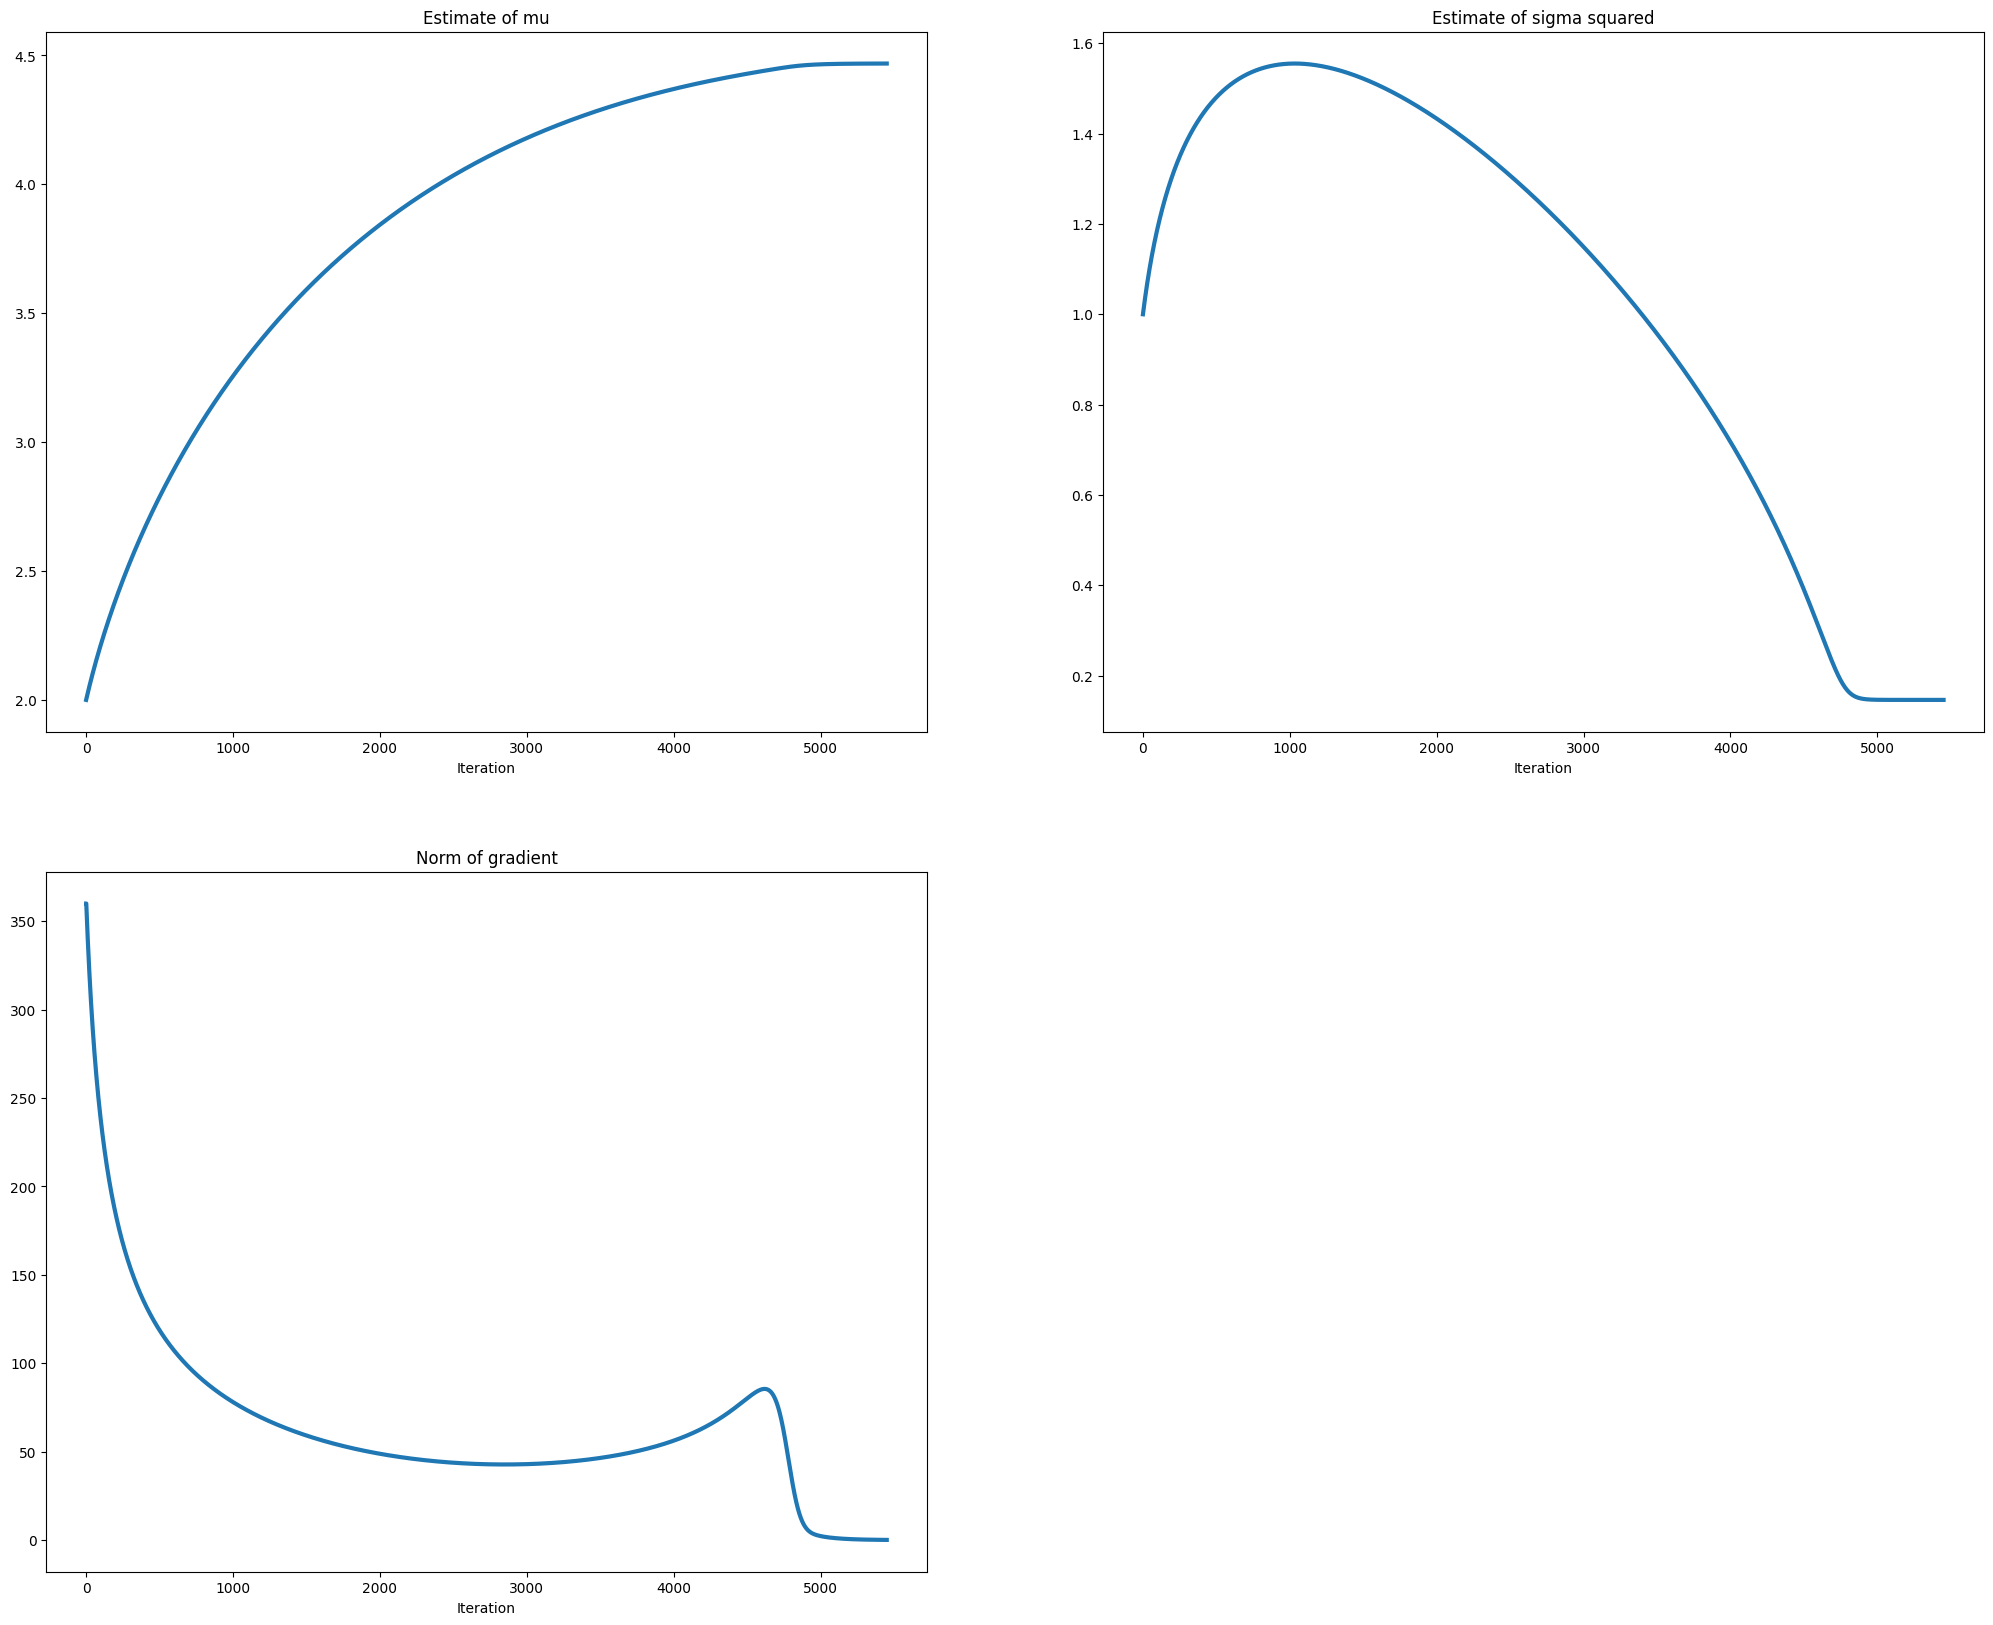

Emperical estiamtes: mu = 4.468603907197355  sigma = 0.3825497727012868   sigma^2 = 0.1463443285938062
MLE parameter values: mu = 4.4684590060122655   sigma^2 = 0.1463443843843113
(44, 80)


shape of mu_values = (80,)
shape of sigma_values = (44,)
shape of likelihood = (44, 80)


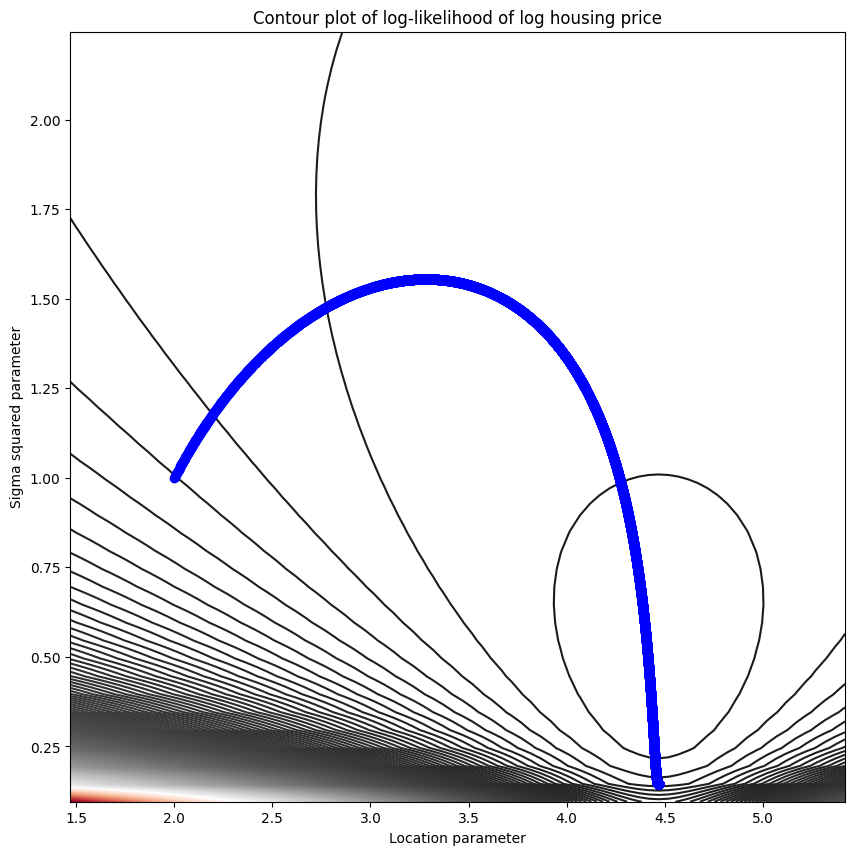

In [7]:
def gradient(params, x):
    n = len(x)
    g1 = np.divide(np.sum(x - params[0]), params[1])
    g2 = -n/(2 * params[1]) + np.divide(np.sum(np.square(x - params[0])), 2 * params[1]**2)
    return [g1, g2]

def grad_descent(x, params, gamma=0.00001, tolerance=0.1):
    mu_values = [params[0]]
    sigma_squared = [params[1]]
    grad_norm = np.linalg.norm(gradient(params, x))
    grad_norm_step = [grad_norm]
    while(grad_norm > tolerance):
 #   for _ in range(200): # Use this iterator for debug
        ## Your code goes below   
        grad = gradient(params, x)
        params = np.add(params, np.multiply(gamma, grad))
        grad_norm = np.linalg.norm(grad)
        mu_values.append(params[0])
        sigma_squared.append(params[1])
        grad_norm_step.append(grad_norm)
    plot_grad_descent(mu_values, sigma_squared, grad_norm_step)
    return params, mu_values, sigma_squared


def plot_grad_descent(mu, sigma, norm):
    ## Setup for plot
    fig, ax = plt.subplots(2, 2, figsize=(25, 20), ) 
    iterations = range(len(mu))
    ax[0,0].plot(iterations, mu, linewidth=3)
    ax[0,0].set_title('Estimate of mu')
    ax[0,0].set_xlabel('Iteration')
    ax[0,1].plot(iterations, sigma, linewidth=3)
    ax[0,1].set_title('Estimate of sigma squared')
    ax[0,1].set_xlabel('Iteration')
    ax[1,0].plot(iterations, norm, linewidth=3)
    ax[1,0].set_title('Norm of gradient')
    ax[1,0].set_xlabel('Iteration')
    ax[1,1].axis('off')
    plt.show()

params, mu_values, sigma_squared_values = grad_descent(log_housing_price_100, [2.0, 1.0])

def plot_path(x, mu_vals, sigma_squ_vals, mu_range=(mu - 3.0, mu + 1.0), sigma_range=(sigma/4, 6*sigma), levels=600):
    ## Plot the log-likelihood   
    plot_Normal_likelihood(x, mu_range=mu_range, sigma_range=sigma_range, levels=levels)
    ## PLot the path of the gradient descent
    plt.plot(mu_vals, sigma_squ_vals, 'bo', lw=3)

sigma = sqrt(np.var(log_housing_price_100))
mu = np.mean(log_housing_price_100)
print(f"Emperical estiamtes: mu = {mu}  sigma = {sigma}   sigma^2 = {sigma**2}")
print(f"MLE parameter values: mu = {params[0]}   sigma^2 = {params[1]}")
plot_path(log_housing_price_100, mu_values, sigma_squared_values)

> Now answer these questions:    
> 1.  Examine the plots of the parameter values and norm of the gradient vs. iteration. Can you see evidence that one parameter is easier to fit than the other?      
> 2. Compare the parameter values estimated with the gradient descent algorithm with the values computed using closed form solution. Are your estimated parameters close to the closed-form solutions? If not, something is likely wrong with your gradient descent algorithm.    
> 3. Examine the contour plot with the descent path. Does the trajectory of the descent path always follow the maximum gradient direction? In other words, is the trajectory of the descent path always perpendicular to the contour lines of the log-likelihood function?       

> **Answers:**      
> 1. Yes, the estimate of $\mu$ rapidly converges. However, the estimate of $\sigma$ deviates considerably before converging, indicating this parameter is harder to estimate.     
> 2. The values of the parameters estimated with gradient descent are nearly the same as the values estimated by the closed-form solution.     
> 3. Yes, the gradient descent path crosses the contours of the likelihood at a right (perpendicular) angle, indicating the path does follow the steepest descent direction.  

## Stochastic gradient descent (SGD)

The simple gradient descent algorithm has limited scalability. The method requires computation and summing of the entire gradient vector. This calculation must be done as a single batch in memory. Computing this full gradient at each step limits scalability. As a result the simple version of gradient descent is referred to as **batch gradient descent**.    

To achieve scalability, the **stochastic gradient descent (SGD)** algorithm computes the expected gradient using a **mini-batch**. The mini-batch is a small Bernoulli sample from the full set of cases. As opposed to batch gradient decent, SGD uses a series of gradient approximations computed from the mini-batches. These gradient approximations are inherently noisy or stochastic, giving rise to the method's name.  

Using mini-batches greatly increases scalability. While the gradient estimates are less accurate, these estimates can be computed very quickly, and using only a small amount of memory. As a result of scalability, SGD is the workhorse of many large-scale statistical methods. Mini-batch optimization is often referred to as **online optimization** since the optimizer algorithm can update the solution as cases arrive. 

The basic idea of stochastic optimization is using a Bernoulli random sample of the data to estimate the **expected update** of the model weights. The weight update for SGD then becomes:

$$\theta_{t+1} = \theta_t + \gamma\ E_{\hat{p}data}\Big[ \nabla_{\theta} J(\theta_t) \Big]$$  

where,  
$E_{\hat{p}data} \big[ \big]$ is the expected value of the gradient given the Bernoulli sample of the data $\hat{p}data$.

Choosing batch size can require some tuning. If the batch is too small, the gradient estimate will be poor. Further, hardware resources will not be fully utilized. Large batches require significant memory and slow the calculation. 

Empirically, SGD has good convergence properties. This behavior seems to arise since stochastic gradient samples provide a better exploration of the loss function space. The variations in the gradient from one mini-batch sample to another help the algorithm escape from saddle points or other areas of the loss function with poor convergence properties. In fact, for very large data sets, the SGD algorithm often converges before the first pass through the data is completed. 

The pseudo-code for the SGD algorithm is:

Notice that if the sampling continues for more than one cycle through the cases, the samples are biased. In practice, this small bias does not seem to matter much.  

> **Exercise 3-4:** In the previous exercise, you used batch gradient descent to estimate the parameters of the distribution of the log housing prices. Now, you will use SGD to estimate these parameters using a Bernoulli sample of 100 log housing price values, follow these steps (this can be the same sample as Exercise 11-5): Using a Bernoulli sample of 100 log housing price values you will compute the '' function to estimate the parameters $\mu$ and $\sigma$ by these steps:   
> 1. Bernoulli sample a mini-batch of `index` of size `batch_size` and `replace=False` using [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) 
> 2. Compute a gradient vector using the mini-batch of observations sampled with the index.     
> 3. Updated the parameter values using the gradient estimates from the update relationship shown above.    
> 4. Append the new estimated parameter vector to the `out` array using [numpy.append](https://numpy.org/doc/stable/reference/generated/numpy.append.html). You will need to reshape the parameter vector to $(1,2)$.    
> 5. Append the norm of the gradient to the `grad_out` list.   
> 6. Compute the standard deviation of the gradient and assign it to the variable `err`.    
> 7. Increment $i$ by $1$.    
> Execute your code and examine the resulting plots. 

Number of iterations = 839
Final gradient value = 0.08657996105806731


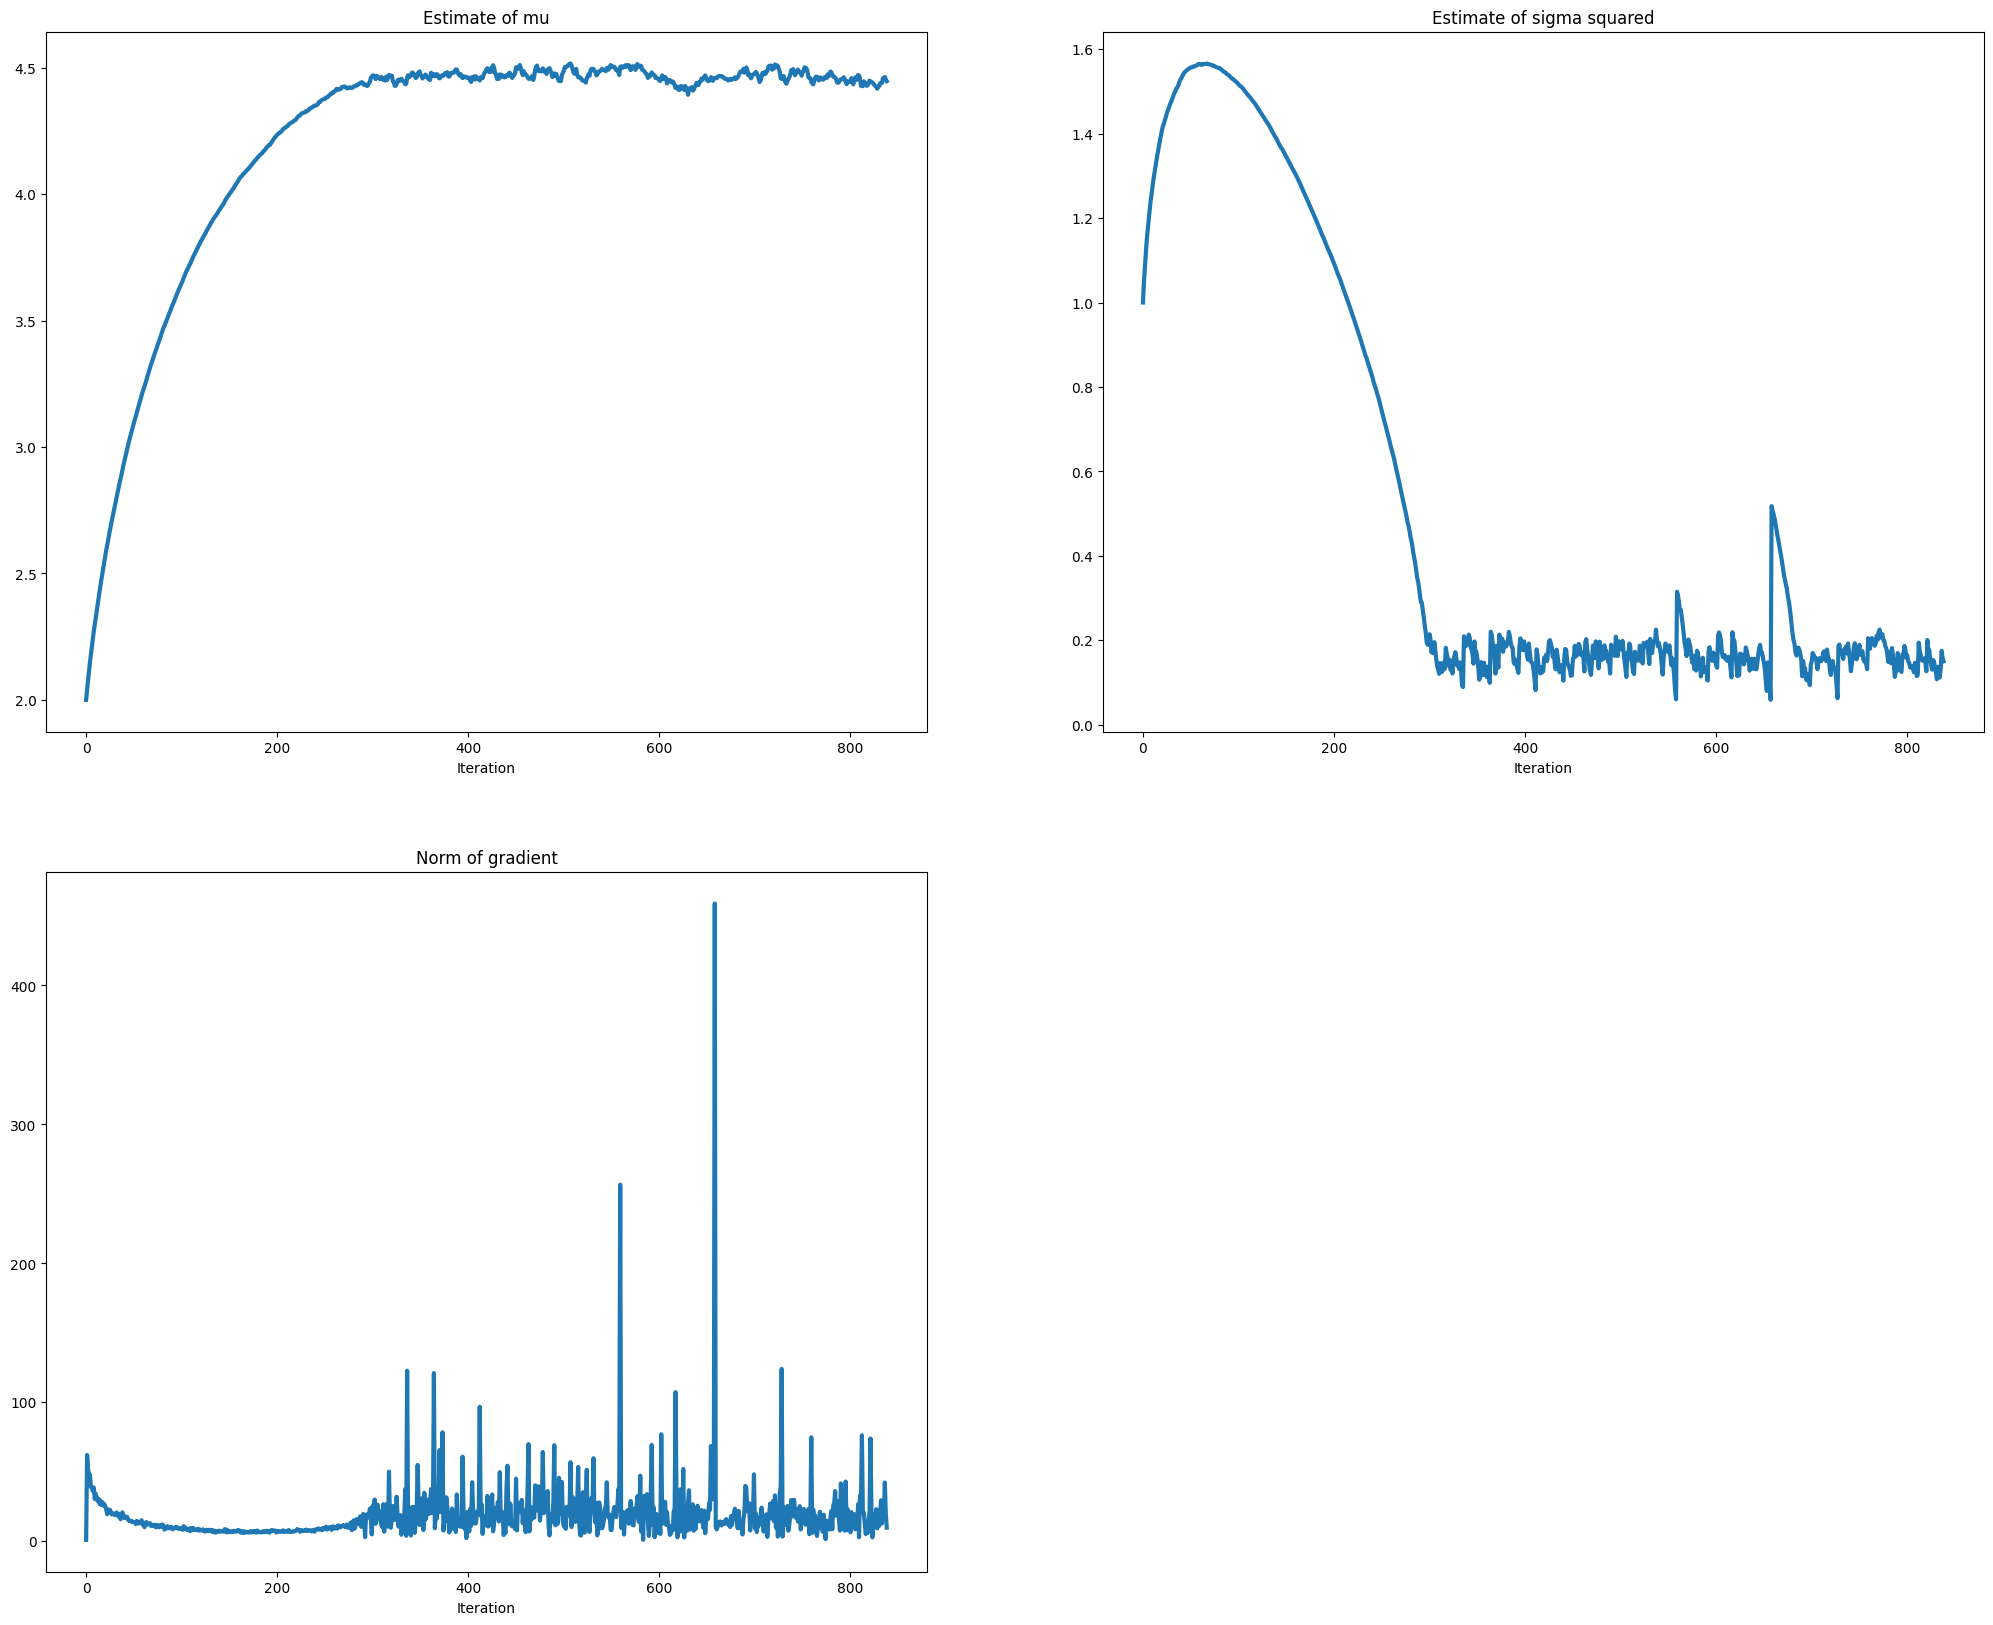

Emperical estiamtes: mu = 4.468603907197355  sigma = 0.3825497727012868   sigma^2 = 0.1463443285938062
MLE parameter values: mu = 4.4684590060122655   sigma^2 = 0.1463443843843113
(44, 80)


shape of mu_values = (80,)
shape of sigma_values = (44,)
shape of likelihood = (44, 80)


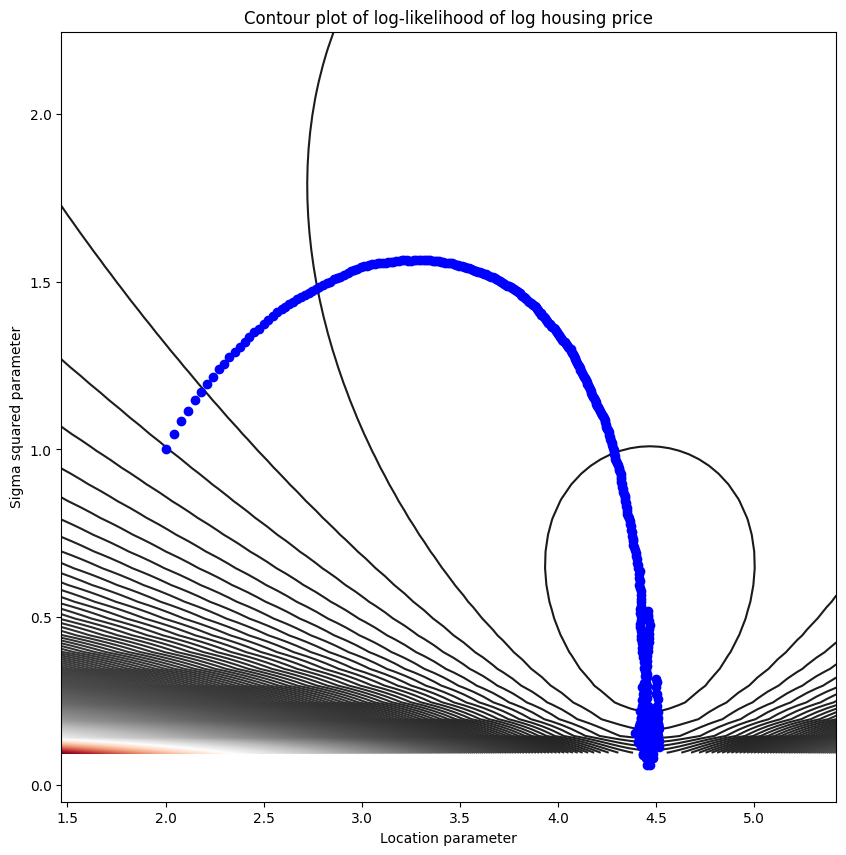

In [8]:
def sgd(x, estimate, lr=0.01, stopping=0.1, batch_size = 16, max_its = 2000):
    out = np.array(estimate).reshape((1,2))
    grad_out = [1.0]
    err = 10000000.0 # start with a big number 
    # starting criteria for graident metric
    i = 1
    indx = range(x.shape[0])
    while((err > stopping) and (i < max_its)):   
        ## Put your code below    
        sample_idx = nr.choice(indx, batch_size, replace=False)
        grad = gradient(estimate, x[sample_idx], )
        estimate = np.add(estimate, np.multiply(lr, grad))
        out = np.append(out, estimate.reshape((1,2)))
        grad_out.append(np.linalg.norm(grad))
        err = np.std(grad)
        i += 1   
    out = out.ravel().reshape((i,2))
    print('Number of iterations = ' + str(i))   
    print('Final gradient value = ' + str(np.std(grad)))
    return out, grad_out

np.random.seed(1245)
params_values, grad_values = sgd(log_housing_price_100, [2.0, 1.0], lr=0.001,
                                 stopping=0.1, max_its=10000)
plot_grad_descent(params_values[:,0], params_values[:,1], grad_values)

sigma = sqrt(np.var(log_housing_price_100))
mu = np.mean(log_housing_price_100)
print(f"Emperical estiamtes: mu = {mu}  sigma = {sigma}   sigma^2 = {sigma**2}")
print(f"MLE parameter values: mu = {params[0]}   sigma^2 = {params[1]}")
plot_path(log_housing_price_100, params_values[:,0], params_values[:,1], 
          mu_range=(mu - 3.0, mu + 1.0), sigma_range=(sigma/4, 6*sigma), levels=600)

> Examine your plot and answer these questions:   
> 1. Examine the plots of the parameter values and norm of the gradient vs. iteration. Can you see evidence that one parameter is easier to fit than the other?   
> 2. Notice the instability of the norm of the gradient near the convergence point. Can you account for this instability arising from the mini-batch sampling?     
> 3. Compare the parameter values estimated with the gradient descent algorithm with the values computed using a closed-form solution. Are your estimated parameters close to the closed-form solutions? If not, something is likely wrong with your gradient descent algorithm.    
> 4. Examine the contour plot with the descent path. Does the trajectory of the descent path always follow the maximum gradient direction? In other words, is the trajectory of the descent path always perpendicular to the contour lines of the log-likelihood function? Can you notice the instability of the algorithm around the convergence point?      

> **Answers:**    
> 1. Yes, the estimate of $\mu$ rapidly converges. However, the estimate of $\sigma$ deviates considerably before converging, indicating this parameter is harder to estimate. Further, the stochastic variation of the $\sigma$ estimate is greater than for $\mu$.  
> 2. The significant variation of the gradient is a result of the variation around the convergence point of the parameter estimate.  
> 3. The values of the parameters estimated with gradient descent are nearly the same as the values estimated by the closed-form solution.     
> 4. At first, the gradient descent path crosses the contours of the likelihood at a right (perpendicular) angle, indicating the path does follow the steepest descent direction. Near the convergence point, the descent path becomes quite random and wanders, which explains the stochastic variation of the parameter estimates and gradient.   

## Sentiment Analysis with Naive Bayes Classification

In [9]:
import pdb
from nltk.corpus import stopwords, twitter_samples
import numpy as np
import pandas as pd
import nltk
import string
from nltk.tokenize import TweetTokenizer
from os import getcwd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

def process_tweet(tweet):
    '''
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    '''
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
            word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

def test_lookup(func):
    freqs = {('sad', 0): 4,
             ('happy', 1): 12,
             ('oppressed', 0): 7}
    word = 'happy'
    label = 1
    if func(freqs, word, label) == 12:
        return 'SUCCESS!!'
    return 'Failed Sanity Check!'

def lookup(freqs, word, label):
    '''
    Input:
        freqs: a dictionary with the frequency of each pair (or tuple)
        word: the word to look up
        label: the label corresponding to the word
    Output:
        n: the number of times the word with its corresponding label appears.
    '''
    n = 0  # freqs.get((word, label), 0)

    pair = (word, label)
    if (pair in freqs):
        n = freqs[pair]
    return n

def count_tweets(result, tweets, ys):
    '''
    Input:
        result: a dictionary that will be used to map each pair to its frequency
        tweets: a list of tweets
        ys: a list corresponding to the sentiment of each tweet (either 0 or 1)
    Output:
        result: a dictionary mapping each pair to its frequency
    '''
    for y, tweet in zip(ys, tweets):
        for word in process_tweet(tweet):
            # define the key, which is the word and label tuple
            pair = (word, y)

            # if the key exists in the dictionary, increment the count
            if pair in result:
                result[pair] += 1

            # else, if the key is new, add it to the dictionary and set the count to 1
            else:
                result[pair] = 1
    return result

In [10]:
nltk.download('stopwords')
nltk.download('twitter_samples')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dwtro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\dwtro\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [11]:
# get the sets of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# split the data into two pieces, one for training and one for testing
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)))
test_y = np.append(np.ones(len(test_pos)), np.zeros(len(test_neg)))

Train your model using Naive Bayes

Naive bayes is an algorithm that could be used for sentiment analysis. It takes a short time to train and also has a short prediction time.

#### So how do you train a Naive Bayes classifier?
- The first part of training a naive bayes classifier is to identify the number of classes that you have.
- You will create a probability for each class.
$P(D_{pos})$ is the probability that the document is positive.
$P(D_{neg})$ is the probability that the document is negative.
Use the formulas as follows and store the values in a dictionary:

$$P(D_{pos}) = \frac{D_{pos}}{D}\tag{1}$$

$$P(D_{neg}) = \frac{D_{neg}}{D}\tag{2}$$

Where $D$ is the total number of documents, or tweets in this case, $D_{pos}$ is the total number of positive tweets and $D_{neg}$ is the total number of negative tweets.

#### Prior and Logprior

The prior probability represents the underlying probability in the target population that a tweet is positive versus negative.  In other words, if we had no specific information and blindly picked a tweet out of the population set, what is the probability that it will be positive versus that it will be negative? That is the "prior".

The prior is the ratio of the probabilities $\frac{P(D_{pos})}{P(D_{neg})}$.
We can take the log of the prior to rescale it, and we'll call this the logprior

$$\text{logprior} = log \left( \frac{P(D_{pos})}{P(D_{neg})} \right) = log \left( \frac{D_{pos}}{D_{neg}} \right)$$.

Note that $log(\frac{A}{B})$ is the same as $log(A) - log(B)$.  So the logprior can also be calculated as the difference between two logs:

$$\text{logprior} = \log (P(D_{pos})) - \log (P(D_{neg})) = \log (D_{pos}) - \log (D_{neg})\tag{3}$$

#### Positive and Negative Probability of a Word
To compute the positive probability and the negative probability for a specific word in the vocabulary, we'll use the following inputs:

- $freq_{pos}$ and $freq_{neg}$ are the frequencies of that specific word in the positive or negative class. In other words, the positive frequency of a word is the number of times the word is counted with the label of 1.
- $N_{pos}$ and $N_{neg}$ are the total number of positive and negative words for all documents (for all tweets), respectively.
- $V$ is the number of unique words in the entire set of documents, for all classes, whether positive or negative.

We'll use these to compute the positive and negative probability for a specific word using this formula:

$$ P(W_{pos}) = \frac{freq_{pos} + 1}{N_{pos} + V}\tag{4} $$
$$ P(W_{neg}) = \frac{freq_{neg} + 1}{N_{neg} + V}\tag{5} $$

Notice that we add the "+1" in the numerator for additive smoothing.  This [wiki article](https://en.wikipedia.org/wiki/Additive_smoothing) explains more about additive smoothing.

#### Log likelihood
To compute the loglikelihood of that very same word, we can implement the following equations:

$$\text{loglikelihood} = \log \left(\frac{P(W_{pos})}{P(W_{neg})} \right)\tag{6}$$

##### Create `freqs` dictionary
- Given your `count_tweets()` function, you can compute a dictionary called `freqs` that contains all the frequencies.
- In this `freqs` dictionary, the key is the tuple (word, label)
- The value is the number of times it has appeared.

We will use this dictionary in several parts of this assignment.

In [12]:
# Build the freqs dictionary for later uses
freqs = count_tweets({}, train_x, train_y)

#### Instructions
Given a freqs dictionary, `train_x` (a list of tweets) and a `train_y` (a list of labels for each tweet), implement a naive bayes classifier.

##### Calculate $V$
- You can then compute the number of unique words that appear in the `freqs` dictionary to get your $V$ (you can use the `set` function).

##### Calculate $freq_{pos}$ and $freq_{neg}$
- Using your `freqs` dictionary, you can compute the positive and negative frequency of each word $freq_{pos}$ and $freq_{neg}$.

##### Calculate $N_{pos}$ and $N_{neg}$
- Using `freqs` dictionary, you can also compute the total number of positive words and total number of negative words $N_{pos}$ and $N_{neg}$.

##### Calculate $D$, $D_{pos}$, $D_{neg}$
- Using the `train_y` input list of labels, calculate the number of documents (tweets) $D$, as well as the number of positive documents (tweets) $D_{pos}$ and number of negative documents (tweets) $D_{neg}$.
- Calculate the probability that a document (tweet) is positive $P(D_{pos})$, and the probability that a document (tweet) is negative $P(D_{neg})$

>**Exercise 3-5:**  In the exercise, you will start your code from this point and complete the code to build the sentiment classifier using Naive Bayes classification:

##### Calculate the logprior
- the logprior is $log(D_{pos}) - log(D_{neg})$

##### Calculate log likelihood
- Finally, you can iterate over each word in the vocabulary, use your `lookup` function to get the positive frequencies, $freq_{pos}$, and the negative frequencies, $freq_{neg}$, for that specific word.
- Compute the positive probability of each word $P(W_{pos})$, negative probability of each word $P(W_{neg})$ using equations 4 & 5.

$$ P(W_{pos}) = \frac{freq_{pos} + 1}{N_{pos} + V}\tag{4} $$
$$ P(W_{neg}) = \frac{freq_{neg} + 1}{N_{neg} + V}\tag{5} $$

**Note:** We'll use a dictionary to store the log likelihoods for each word.  The key is the word, the value is the log likelihood of that word).

- You can then compute the loglikelihood: $log \left( \frac{P(W_{pos})}{P(W_{neg})} \right)\tag{6}$.

In [18]:
def train_naive_bayes(freqs, train_x, train_y):
    '''
    Input:
        freqs: dictionary from (word, label) to how often the word appears
        train_x: a list of tweets
        train_y: a list of labels correponding to the tweets (0,1)
    Output:
        logprior: the log prior. (equation 3 above)
        loglikelihood: the log likelihood of you Naive bayes equation. (equation 6 above)
    '''
    loglikelihood = {}
    logprior = 0

    # calculate V, the number of unique words in the vocabulary
    vocab = set([pair[0] for pair in freqs.keys()])
    V = len(vocab)

    # calculate N_pos and N_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
        # if the label is positive (greater than zero)
        if pair[1] > 0:

            # Increment the number of positive words by the count for this (word, label) pair
            N_pos += freqs[pair]

        # else, the label is negative
        else:

            # increment the number of negative words by the count for this (word,label) pair
            N_neg += freqs[pair]

    # Calculate D, the number of documents
    D = len(train_y)

    # Calculate D_pos, the number of positive documents (*hint: use sum(<np_array>))
    D_pos = len(list(filter(lambda x: x > 0, train_y)))

    # Calculate D_neg, the number of negative documents (*hint: compute using D and D_pos)
    D_neg = len(list(filter(lambda x: x <= 0, train_y)))

    ## Put your code below
    # Calculate logprior
    logprior = np.log(D_pos) - np.log(D_neg)

    # For each word in the vocabulary...
    for word in vocab:
        # get the positive and negative frequency of the word
        freq_pos = lookup(freqs, word, 1)
        freq_neg = lookup(freqs, word, 0)

        # calculate the probability that each word is positive, and negative
        p_w_pos = (freq_pos + 1) / (N_pos + V)
        p_w_neg = (freq_neg + 1) / (N_neg + V)

        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos / p_w_neg)

    return logprior, loglikelihood


In [19]:
# DO NOT EDIT Cell - Check your result to match expected below
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)
print(logprior)
print(len(loglikelihood))

0.0
9085


>**Expected Output**:

>0.0

>9085

In [20]:
def naive_bayes_predict(tweet, logprior, loglikelihood):
    '''
    Input:
        tweet: a string
        logprior: a number
        loglikelihood: a dictionary of words mapping to numbers
    Output:
        p: the sum of all the logliklihoods of each word in the tweet (if found in the dictionary) + logprior (a number)

    '''
    # process the tweet to get a list of words
    word_l = process_tweet(tweet)
    # initialize probability to zero
    p = 0
    # add the logprior
    p += logprior
    for word in word_l:
       # check if the word exists in the loglikelihood dictionary
        if word in loglikelihood:
            # add the log likelihood of that word to the probability
            p += loglikelihood[word]
    return p


In [21]:
# Experiment with your own tweet.
my_tweet = 'I love machine learning homework.'
p = naive_bayes_predict(my_tweet, logprior, loglikelihood)
print('The expected output is', p)

The expected output is 1.1297469096461152
